In [1]:
import pandas as pd
import json
from collections import defaultdict
import os
from PIL import Image
from pathlib import Path

In [2]:
class YoloDataset():
    def __init__(self, csv: str = 'dataset.csv', image_folder: str = 'data', result_folder: str = 'Yolo'):
        
        '''
        csv: str - path to csv file
        images_folder: str - path to images folder
        result_folder: str - where to store results
        '''
        
        df = pd.read_csv(csv)
        self.df = df.dropna()
        
        # https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-nested-directory-in-python
        Path(result_folder).mkdir(parents=True, exist_ok=True)
        self.image_folder = image_folder
        self.result_folder = result_folder
        
        # Default dict to store classes
        self.classes = defaultdict(lambda: -1)
        
    def cvt_path(self, path):
        
        # Removing Google bucket part
        path = path.split('/')[3:]
        
        # Returning relative path to image
        return os.sep.join(path)
    
    def cvt_point(self, point):
        
        # Extracting positions and label
        x, y, h, w = point['x']/100, point['y']/100, point['height']/100, point['width']/100
        label = point['rectanglelabels'][0]
        
        # If no such class was here
        if self.classes[label] == -1:
            self.classes[label] = len(self.classes.keys()) - 1
            
        # Returning the correct format string
        return f'{self.classes[label]} {x+h/2} {y+h/2} {w} {h}'
    
    def cvt_points(self, points, filename):
        
        # Converting to the correct out format all points
        result = [self.cvt_point(p) for p in points]
        result = '\n'.join(result)
        
        # Writing to the file
        f_path = os.path.join(self.result_folder, filename + '.txt')
        with open(f_path, 'w+') as out:
            out.write(result)
            
    def cvt_image(self, image_name, filename):
        
        # Reading Image
        im_path = os.path.join(self.image_folder, image_name)
        with Image.open(im_path) as image:
            
            # Resizing to (416, 416), as required by Yolo
            image = image.resize((416, 416))
            
            # Avoiding crashes
            image = image.convert('RGB')
            f_path = os.path.join(self.result_folder, filename)
            image.save(f_path)
        
    def cvt_column(self, col):
        
        # Extracting paths to read/write image and txt
        name = self.cvt_path(col[0])
        out_name = ''.join([n for n in name.split(os.sep)])
        
        # Extracting json with points
        points = json.loads(col[2])
        
        # Parsing results
        self.cvt_image(name, out_name)
        self.cvt_points(points, out_name)
    
    def parse(self):
        
        # Iterating over all columns
        self.df.apply(self.cvt_column, axis=1)
        
        # Writing labels file
        classes = '\n'.join(self.classes.keys())
        with open(os.path.join(self.result_folder, '_darknet.labels'), 'w+') as out:
            out.write(classes)

In [3]:
a = YoloDataset(result_folder='Yolo')

In [4]:
a.parse()

# X, Y - TOP LEFT CORNER IN LABEL STUDIO!

In [61]:
plt.rcParams["figure.figsize"] = (16,10)

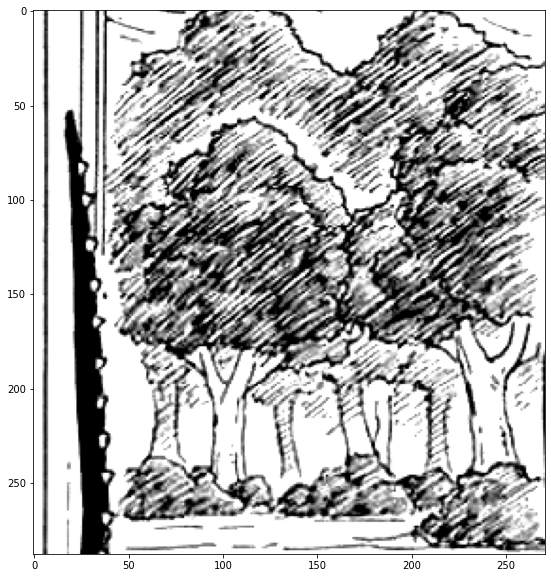

In [64]:
plt.imshow(image[1800:2088, 822:1093])

# X, Y - CENTER IN YOLO

In [65]:
image = cv2.imread('yoloim.jpg')

In [66]:
image.shape

(416, 416, 3)

In [ ]:
0.7403846153846154 0.7620192307692307 0.18389423076923078 0.25600961538461536

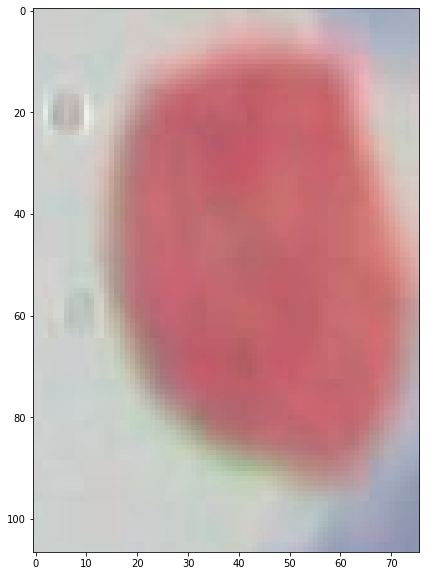

In [67]:
plt.imshow(image[263:370, 270:346])

# Coordinates match